Problem Statement:

|A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BikeIndia has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BikeIndia aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes. How well those variables describe the bike demands Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

Business Goal:
We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market

## Step 1 : Importing Libraries 

In [1]:
#imporitng the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

# Step 2 : Reading and Understanding Data

In [2]:
#Read csv file 
bike_dataset = pd.read_csv('day.csv')

In [3]:
#describe the data
bike_dataset.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
#Check the data
bike_dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
#check the descrpitive info
bike_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
#check the columns of data
bike_dataset.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [9]:
#check the shape of the bike_dataset
bike_dataset.shape

(730, 16)

Dataset has 730 rows and 16 columns.

Except one column, all other are either float or integer type.

One column is date type.

Looking at the data, there seems to be some fields that are categorical in nature, but in integer/float type.

We will analyse and finalize whether to convert them to categorical or treat as integer

## Step 3: Cleaning data

In [11]:
bike_dataset.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


There are no null values 

### Dupilcate check in data

In [13]:
bike_dataset_d = bike_dataset.copy()

In [14]:
bike_dataset_d.shape

(730, 16)

In [15]:
bike_dataset.shape

(730, 16)

Finding:

The shape after running the drop duplicate command is same as the original dataframe.

Therefore we can conclude that there were zero duplicate values in the dataset.

### Remove the unwanted columns which are not useful for analysis furture|

Based on the high level look at the data and the data dictionary, the following variables can be removed from further analysis:

instant : Its only an index value

dteday : This has the date, Since we already have seperate columns for 'year' & 'month',hence, we could live without this column.

casual & registered : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns. More over, we have created a new variable to have the ratio of these customer types.

We will save the new dataframe as bike_dataset, so that the original dataset is preserved for any future analysis/validation

In [16]:
#Before dropping dteday column, let us introduce a days_old variable which indicates how old is the business
bike_dataset['days_old'] = (pd.to_datetime(bike_dataset['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

In [17]:
#Check once
bike_dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,days_old
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


In [18]:
# Droping instant column as it is index column which has nothing to do with target
bike_dataset.drop(['instant'], axis = 1, inplace = True)

# Dropping dteday as we have already have month and weekday columns to work with
bike_dataset.drop(['dteday'], axis = 1, inplace = True)

# Dropping casual and registered columnsa as as we have cnt column which is sum of the both that is the target column

bike_dataset.drop(['casual'], axis = 1, inplace = True)
bike_dataset.drop(['registered'], axis = 1, inplace = True)

In [19]:
#Check once after dropping 
bike_dataset.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


In [20]:
bike_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  days_old    730 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 74.3 KB


In [21]:
bike_dataset.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [22]:
bike_dataset.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [23]:
bike_dataset.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,0.004012,0.017868,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584,0.413587
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,0.000685,-0.011852,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728,0.866026
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,-0.004059,-0.010414,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191,0.498251
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.020145,-0.257009,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764,0.016275
weekday,4.012478e-03,6.852851e-04,-4.059002e-03,-0.020145,1.000000,0.001588,0.034216,0.044876,0.037964,0.008780,-0.017230,0.036183,-0.001182
workingday,1.786841e-02,-1.185197e-02,-1.041372e-02,-0.257009,0.001588,1.000000,-0.026332,0.002044,0.010657,0.053770,-0.002453,-0.027640,-0.015171
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.034216,-0.026332,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929,-0.021862
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,0.044876,0.002044,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044,0.150738
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,0.037964,0.010657,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685,0.152773
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,0.008780,0.053770,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543,0.016080


we can see that features like season, mnth, weekday and  weathersit are integers although they should be non-numerical categories.

### Handle Outliners

In [24]:
bike_dataset.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'days_old'],
      dtype='object')

In [25]:
bike_dataset.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
days_old      730
dtype: int64

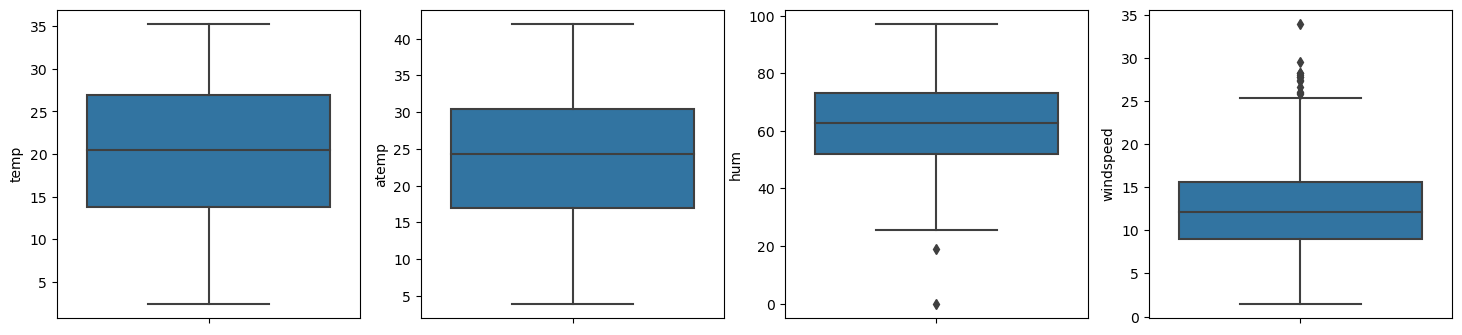

In [26]:
#Draw the box plots for indepemdent variables with continuous values
cols=['temp','atemp','hum','windspeed']
plt.figure(figsize=(18,4))

i=1
for x in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=x, data=bike_dataset)
    i+=1

From these plots, we can see there are no outliers to be handled. We are good with not having any outliers in the data set

## Step 4: EDA

In [27]:
# mapping the season column to given catgeories 

bike_dataset.season = bike_dataset.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [28]:
# mapping the month column 
bike_dataset.mnth = bike_dataset.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})


In [29]:
# mapping the weekday column 
bike_dataset.weekday = bike_dataset.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [30]:
# mapping the weathersit column 
bike_dataset.weathersit = bike_dataset.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [31]:
# Check once the data after mapping 
bike_dataset.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,4


In [32]:
#Check the column info 
bike_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  days_old    730 non-null    int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 74.3+ KB


### Design the pair plots to check the linear relationship 

<Figure size 1500x3000 with 0 Axes>

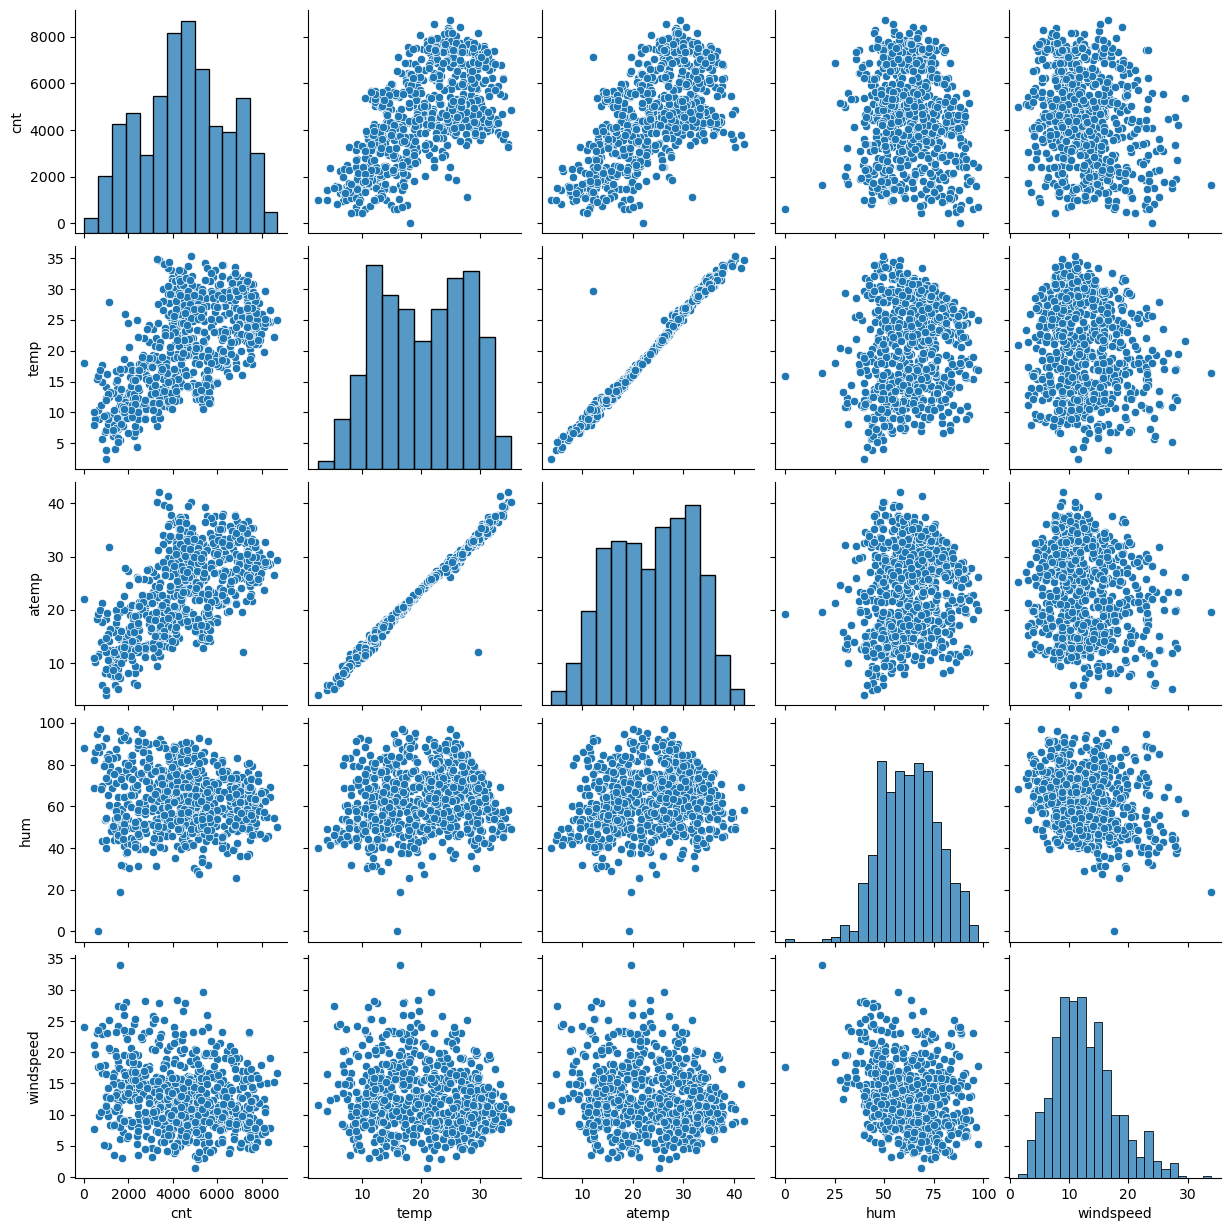

In [33]:
#Draw pairplots for continuous numeric variables using seaborn
plt.figure(figsize = (15,30))
sns.pairplot(data=bike_dataset,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

The ‘temp’ and ‘atemp’ variables have highest correlation when compared to the rest with
target variable as ‘cnt’.

### Visualising the Data and plotting each column visualization

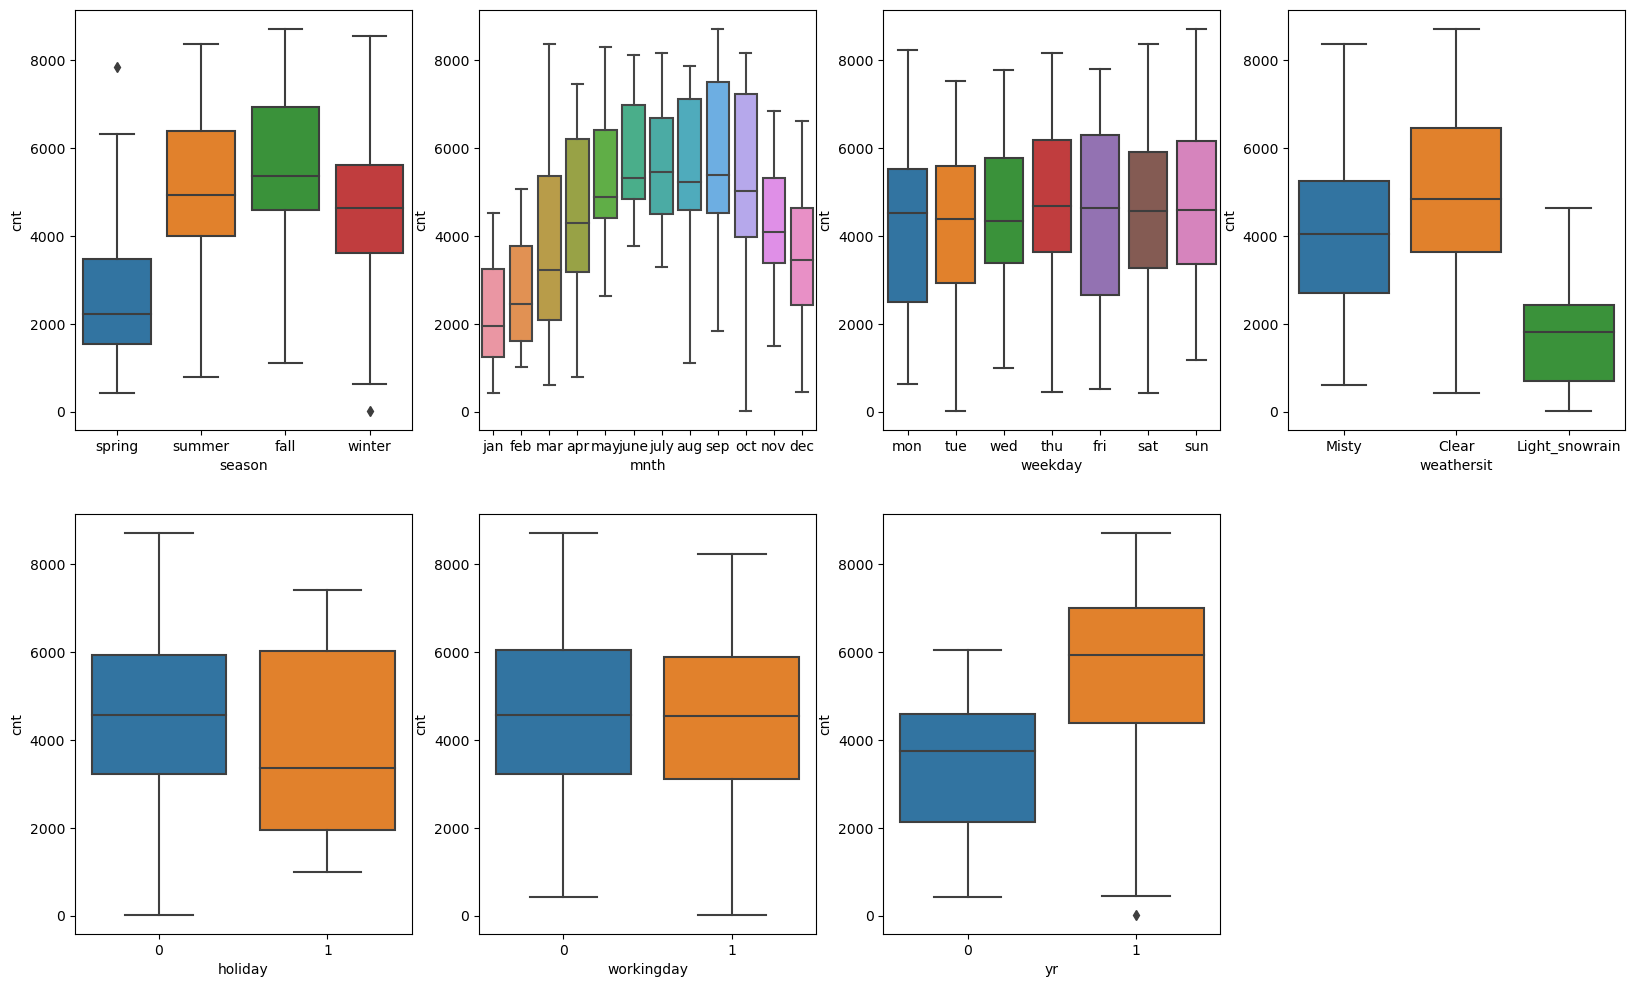

In [34]:
# Analysing/visualizing the categorical columns
# to see how predictor variable stands against the target variable

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_dataset)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_dataset)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_dataset)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_dataset)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_dataset)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_dataset)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_dataset)
plt.show()

#### _`observations`_:

    Here many insights can be drawn from the plots

    1. Season: 3:fall has highest demand for rental bikes
    2. I see that demand for next year has grown
    3. Demand is continuously growing each month till June. September month has highest demand. After September, demand is       ----------decreasing
    4. When there is a holiday, demand has decreased.
    5. Weekday is not giving clear picture abount demand.
    6. The clear weathershit has highest demand
    7. During September, bike sharing is more. During the year end and beginning, it is less, could be due to extereme------- weather conditions.

In [36]:
# function to create barplot related to categorical columns

def visu_cat_columns(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(x=column, y='cnt', data=bike_dataset)
    plt.subplot(1,2,2)
    sns.barplot(x=column, y='cnt', data=bike_dataset, hue='yr',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()

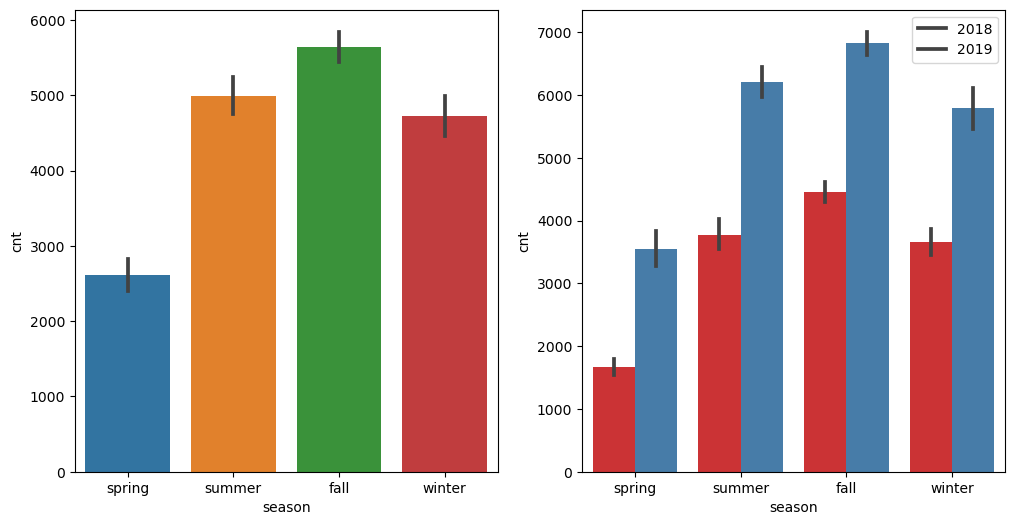

In [37]:
# plotting visualization for season column
visu_cat_columns('season')

Fall season seems to have attracted more booking. And, in each season the booking count has increased drastically from 2018 to 2019

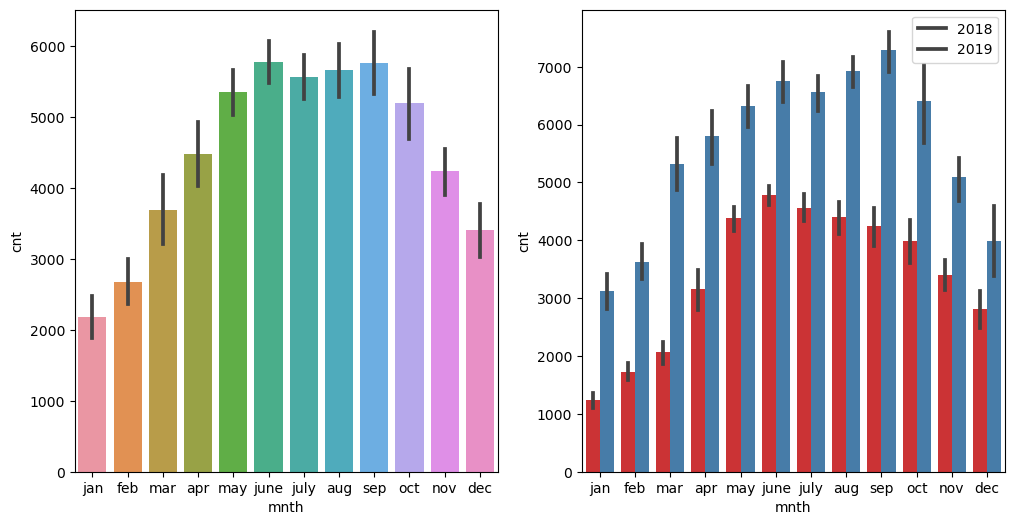

In [38]:
# plotting visualization for season column
visu_cat_columns('mnth')

Most of the bookings has been done during the month of may, june, july, aug, sep and oct.Trend increased starting of the year tillmid of the year and then it started decreasing as we approached the end of year. Number of booking for each month seems to have increased from 2018 to 2019.

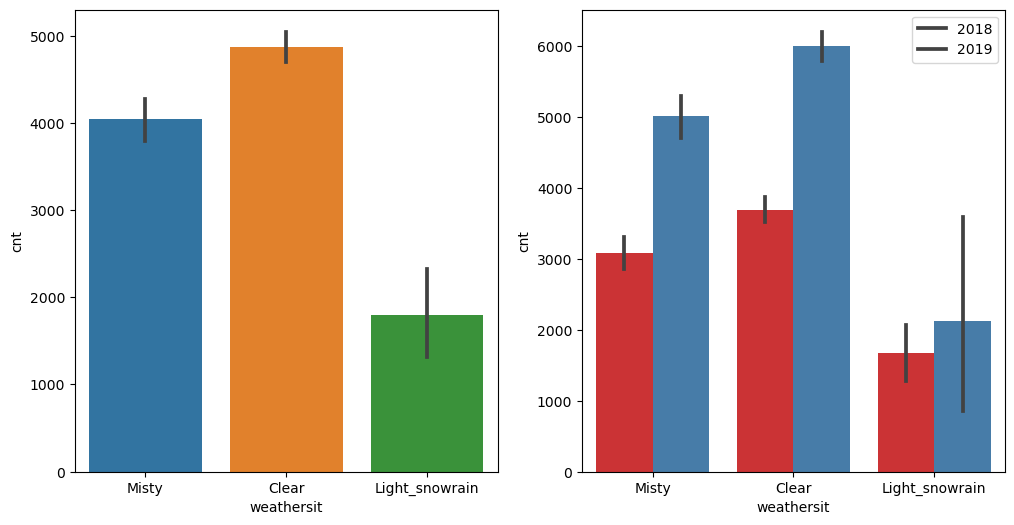

In [39]:
# plotting visualization for season column
visu_cat_columns('weathersit')

Clear weather attracted more booking which seems obvious. And in comparison to previous year, i.e 2018, booking increased for each weather situation in 2019.

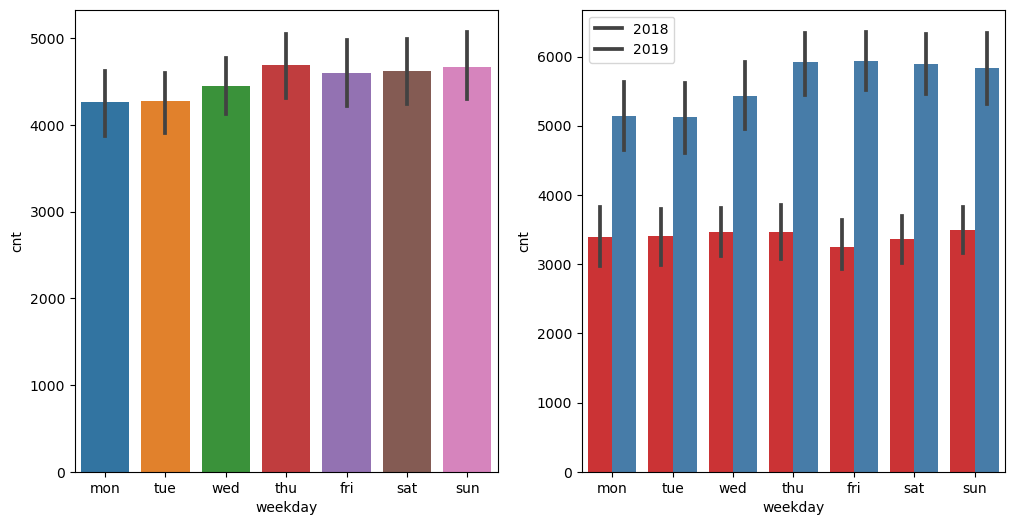

In [40]:
# plotting visualization for season column
visu_cat_columns('weekday')

Thu, Fir, Sat and Sun have more number of bookings as compared to the start of the week.

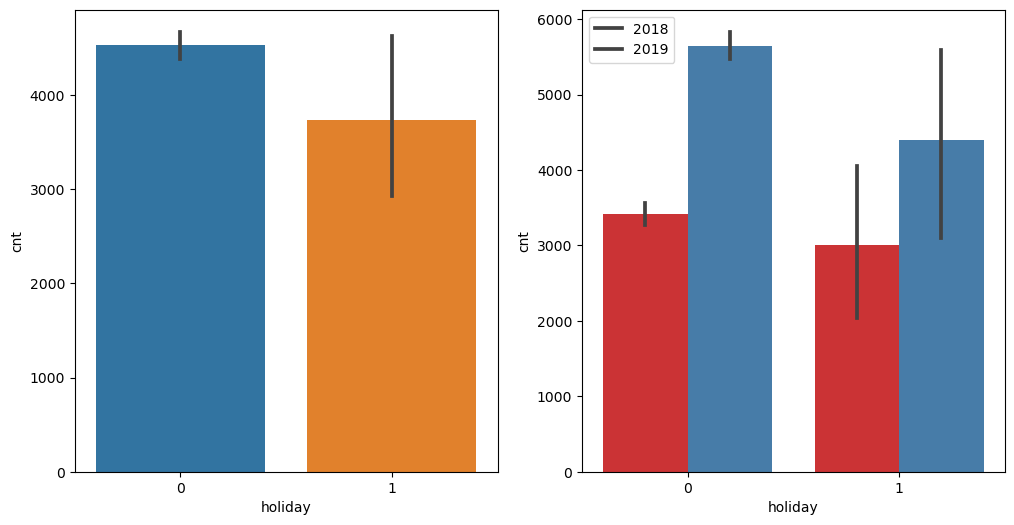

In [41]:
# plotting visualization for season column
visu_cat_columns('holiday')

When its not holiday, booking seems to be less in number which seems reasonable as on holidays, people may want to spend time at home and enjoy with family.

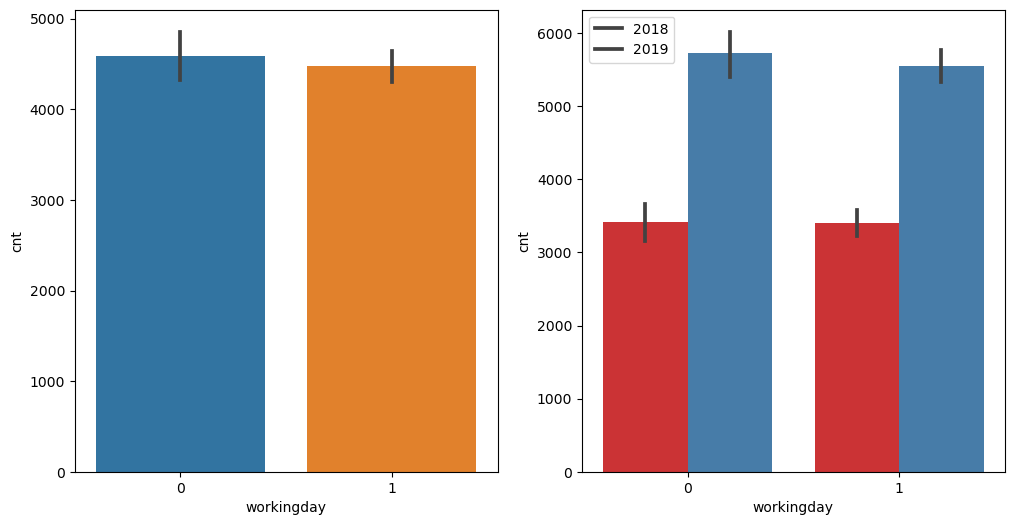

In [42]:
# plotting visualization for season column
visu_cat_columns('workingday')

Booking seemed to be almost equal either on working day or non-working day. But, the count increased from 2018 to 2019.

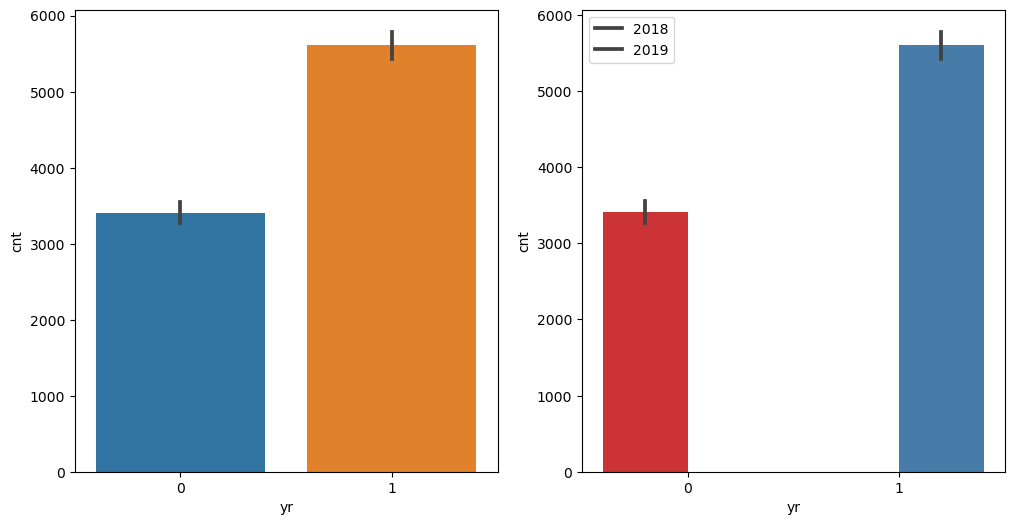

In [43]:
# plotting visualization for season column
visu_cat_columns('yr')

2019 attracted more number of booking from the previous year, which shows good progress in terms of business.

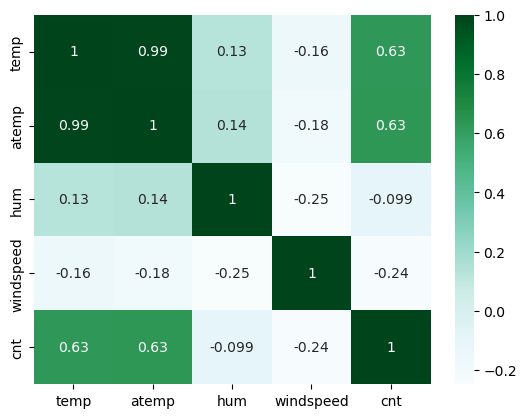

In [44]:
# Checking continuous variables relationship with each other
sns.heatmap(bike_dataset[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

There is linear relationship between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity. We will decide which parameters to keep based on VIF and p-value w.r.t other variables

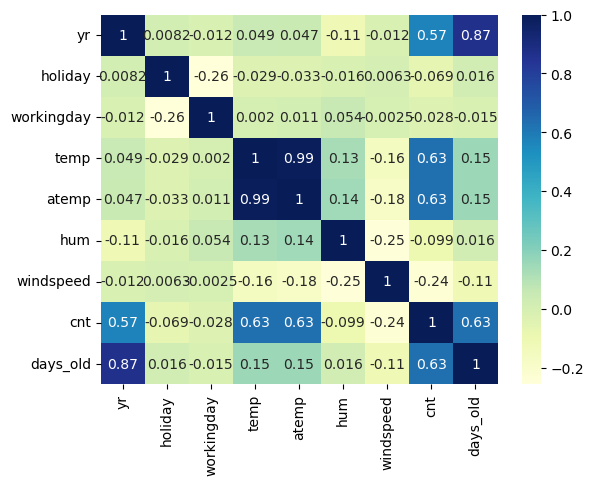

In [45]:
#Correlations for numeric variables
cor=bike_dataset.corr()
sns.heatmap(cor, cmap="YlGnBu", annot = True)
plt.show()

From the correlation map, temp, atemp and days_old seems to be highly correlated and only should variable can be considered for the model. However let us elminate it based on the Variance Inflation Factor later during the model building.
We also see Target variable has a linear relationship with some of the indeptendent variables. Good sign for building a linear regression Model

In [47]:
bike_dataset.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849,364.500000
std,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647,210.877136
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,182.250000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,364.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,546.750000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,729.000000


## Step 4: Data Preapation for linear Regression

### Create dummy variables for all categorical variables

In [48]:
# Dummy variable creation for month, weekday, weathersit and season variables.

months_bkd=pd.get_dummies(bike_dataset.mnth,drop_first=True)
weekdays_bkd=pd.get_dummies(bike_dataset.weekday,drop_first=True)
weathersit_bkd=pd.get_dummies(bike_dataset.weathersit,drop_first=True)
seasons_bkd=pd.get_dummies(bike_dataset.season,drop_first=True)

In [49]:
bike_dataset.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,4


In [50]:
# Merging  the dataframe, with the dummy variable dataset. 

bike_dataset_new = pd.concat([bike_dataset,months_bkd,weekdays_bkd,weathersit_bkd,seasons_bkd],axis=1)

In [51]:
bike_dataset_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,...,0,0,0,1,0,0,1,1,0,0
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,1,0,0
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,...,0,0,1,0,0,0,0,1,0,0
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [52]:
bike_dataset_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   yr              730 non-null    int64  
 2   mnth            730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   hum             730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  days_old        730 non-null    int64  
 13  aug             730 non-null    uint8  
 14  dec             730 non-null    uint8  
 15  feb             730 non-null    uint8  
 16  jan             730 non-null    uint8  
 17  july            730 non-null    uin

In [53]:
# dropping unnecessary columns as we have already created dummy variable out of it.

bike_dataset_new.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [54]:
bike_dataset_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   hum             730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   days_old        730 non-null    int64  
 9   aug             730 non-null    uint8  
 10  dec             730 non-null    uint8  
 11  feb             730 non-null    uint8  
 12  jan             730 non-null    uint8  
 13  july            730 non-null    uint8  
 14  june            730 non-null    uint8  
 15  mar             730 non-null    uint8  
 16  may             730 non-null    uint8  
 17  nov             730 non-null    uin

In [55]:
# check the head of new dataframe

bike_dataset_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,aug,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,1,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,0,...,0,0,0,0,0,0,0,1,0,0


In [56]:
# check the shape of new dataframe

bike_dataset_new.shape

(730, 31)

In [57]:
# check the column info of new dataframe 

bike_dataset_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   hum             730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   days_old        730 non-null    int64  
 9   aug             730 non-null    uint8  
 10  dec             730 non-null    uint8  
 11  feb             730 non-null    uint8  
 12  jan             730 non-null    uint8  
 13  july            730 non-null    uint8  
 14  june            730 non-null    uint8  
 15  mar             730 non-null    uint8  
 16  may             730 non-null    uint8  
 17  nov             730 non-null    uin

## Step 5 : Model Building 
### Splitting the Data into Training and Testing Sets

In [58]:
# Checking shape before splitting
bike_dataset_new.shape

(730, 31)

In [59]:
# splitting the dataframe into Train and Test

np.random.seed(0)
Bike_train, Bike_test = train_test_split(bike_dataset_new, train_size = 0.7, random_state = 100)

In [60]:
#Inspect independent variables
Bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,aug,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,576,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,426,0,...,0,1,0,0,0,0,1,1,0,0
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,728,0,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,482,0,...,0,1,0,0,0,0,1,0,1,0
111,0,0,0,13.803347,16.0977,72.9583,14.707907,1683,111,0,...,0,1,0,0,0,0,1,0,1,0


In [61]:
# Checking shape and size for train and test
print(Bike_train.shape)
print(Bike_test.shape)

(510, 31)
(220, 31)


### Feature Scaling continuous variables

In [62]:
# Importing required library
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [63]:
# Let us scale continuous variables
numeric_vars = ['temp','atemp','hum','windspeed','cnt']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
Bike_train[numeric_vars] = scaler.fit_transform(Bike_train[numeric_vars])

In [64]:
#Inspect stats fro Training set after scaling
Bike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,aug,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,367.680392,0.096078,...,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,209.596164,0.294988,...,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,186.250000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,372.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,551.750000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,728.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [65]:
Bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,aug,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,576,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,426,0,...,0,1,0,0,0,0,1,1,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,728,0,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,482,0,...,0,1,0,0,0,0,1,0,1,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,111,0,...,0,1,0,0,0,0,1,0,1,0


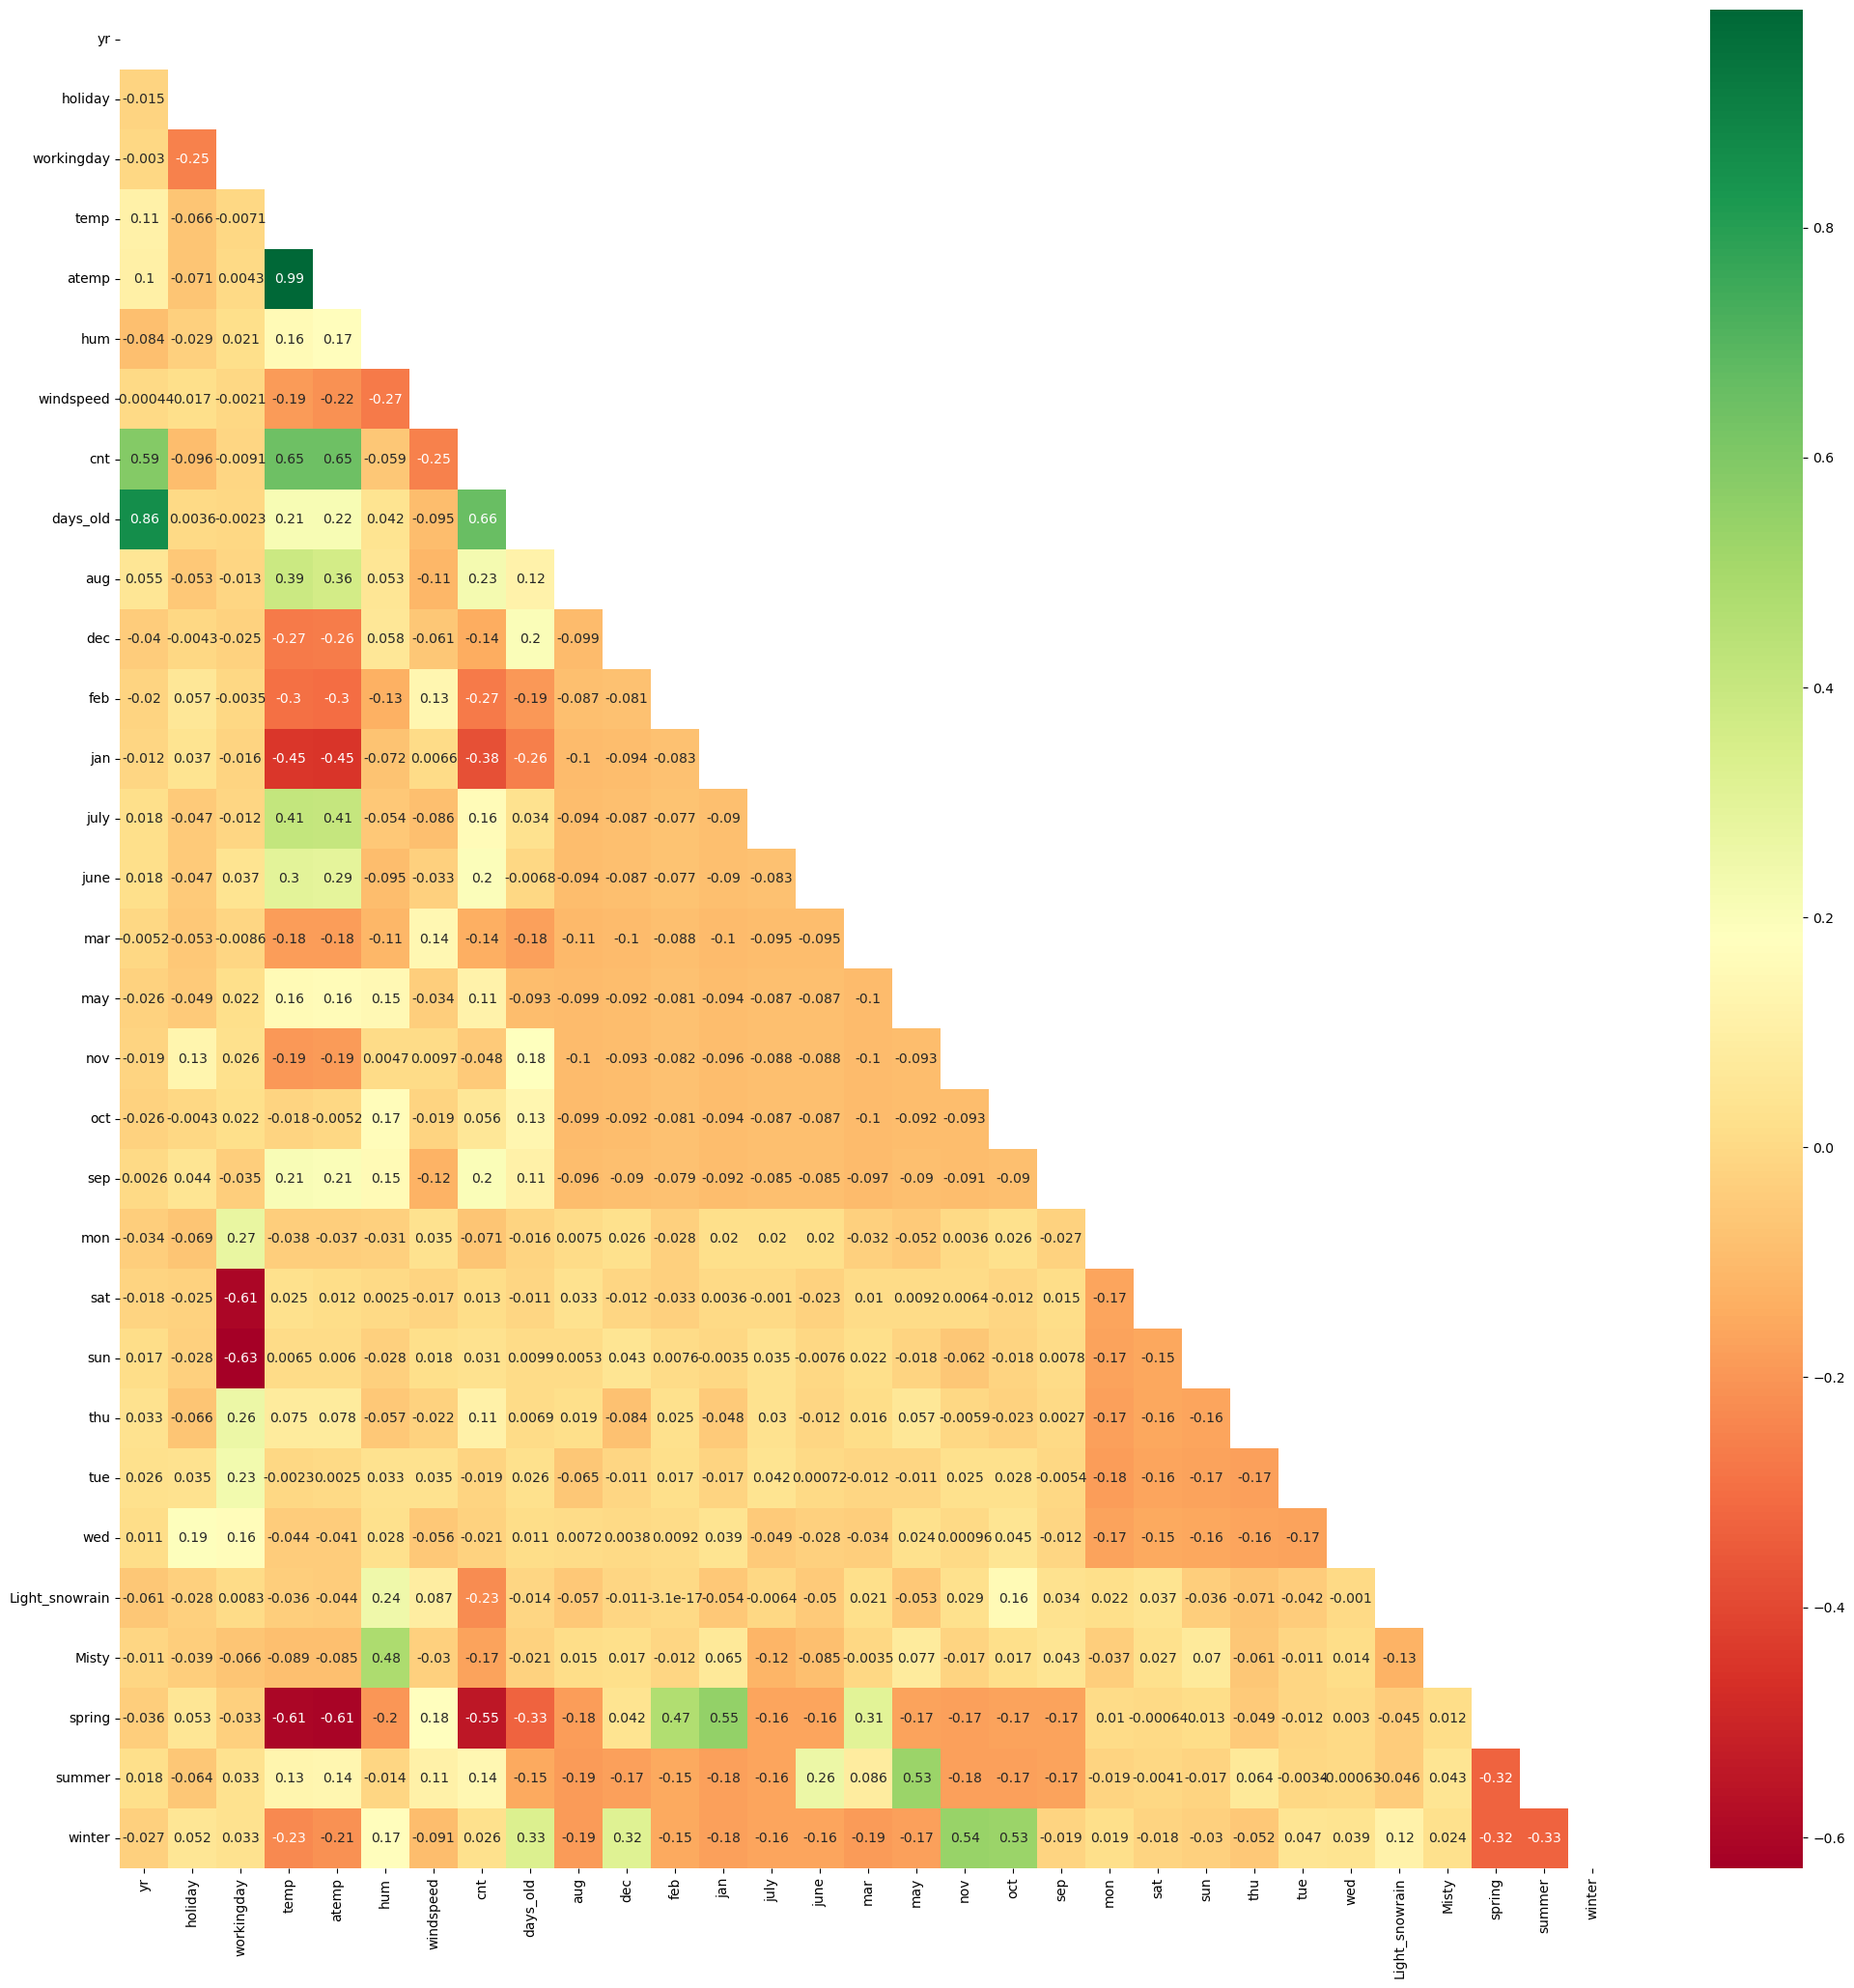

In [66]:
# check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,25))
matrix = np.triu(Bike_train.corr())
sns.heatmap(Bike_train.corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.show()

cnt seems to have correlation with year variable and temp. Similarly, Misty and humidity show correlation. Spring season with Jan and Feb month, Summer season with may month and Winter season with oct and nov month show good correlation.

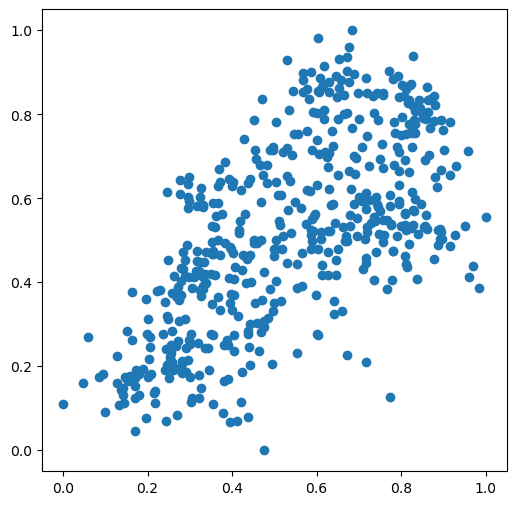

In [67]:
# Visualizing one of the correlation to see the trends via Scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(Bike_train.temp, Bike_train.cnt)
plt.show()

Visualization confirms the positive correlation between temp and cnt.

### Build a Model using RFE and Automated approach

In [68]:
# Building the Linear Model

y_train = Bike_train.pop('cnt')
X_train = Bike_train

In [69]:
# Recursive feature elimination 

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [70]:

# RFE with 15 features
rfe = RFE(estimator=lm, n_features_to_select=15)
rfe.fit(X_train, y_train)


RFE(estimator=LinearRegression(), n_features_to_select=15)

In [71]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('days_old', False, 16),
 ('aug', False, 10),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 12),
 ('mar', False, 15),
 ('may', False, 9),
 ('nov', True, 1),
 ('oct', False, 13),
 ('sep', True, 1),
 ('mon', False, 8),
 ('sat', False, 5),
 ('sun', False, 6),
 ('thu', False, 14),
 ('tue', False, 7),
 ('wed', False, 11),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

## Manual elimination
### Function to build a model using statsmodel api

In [72]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'dec', 'jan', 'july',
       'nov', 'sep', 'Light_snowrain', 'Misty', 'spring', 'summer', 'winter'],
      dtype='object')


In [73]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'days_old', 'aug', 'feb', 'june', 'mar', 'may',
       'oct', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [74]:
# Generic function to calculate VIF of variables

def find_VIF(dataset):
    vif = pd.DataFrame()
    vif['Features'] = dataset.columns
    vif['VIF'] = [variance_inflation_factor(dataset.values, i) for i in range(dataset.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [75]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [76]:
# calculate VIF

find_VIF(X_train_rfe)

,Features,VIF
3,hum,30.89
2,temp,17.79
4,windspeed,4.72
12,spring,4.37
14,winter,4.06
13,summer,2.82
11,Misty,2.32
0,yr,2.09
8,nov,1.85
6,jan,1.75


In [77]:
X_train_rfe.shape

(510, 15)

## Step 6 - Build Model

## Model 1

In [78]:
# Building 1st linear regression model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          8.15e-189
Time:                        20:31:24   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3197      0.036      8.

In [79]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['hum'], axis = 1)

# Run the function to calculate VIF for the new model
find_VIF(X_train_new)

,Features,VIF
2,temp,5.17
3,windspeed,4.67
13,winter,2.95
11,spring,2.89
12,summer,2.24
0,yr,2.07
7,nov,1.81
5,jan,1.66
6,july,1.59
10,Misty,1.57


VIF values seems to be good now. But we will see if we can reduce further ?

In [80]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          4.75e-186
Time:                        20:31:54   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2450      0.032      7.

In [81]:
# We can drop nov variable as it has high p-value
X_train_new = X_train_new.drop(['nov'], axis = 1)

# Run the function to calculate VIF for the new model
find_VIF(X_train_new)

,Features,VIF
2,temp,5.14
3,windspeed,4.62
10,spring,2.89
11,summer,2.24
0,yr,2.07
12,winter,2.05
5,jan,1.65
6,july,1.59
9,Misty,1.57
7,sep,1.34


VIF doesnt seems to be affected much after dropping few of the variables. Lets proceed more to observe better model.

In [82]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          2.74e-186
Time:                        20:32:24   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     496   BIC:                            -918.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2283      0.031      7.

In [83]:
# We can drop dec variable as it has high p-value
X_train_new = X_train_new.drop(['dec'], axis = 1)

# Run the function to calculate VIF for the new model
find_VIF(X_train_new)

,Features,VIF
2,temp,5.13
3,windspeed,4.62
9,spring,2.75
10,summer,2.24
0,yr,2.07
11,winter,1.78
4,jan,1.61
5,july,1.59
8,Misty,1.56
6,sep,1.34


In [84]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          8.14e-187
Time:                        20:32:38   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2154      0.030      7.

In [85]:
# We can drop jan variable as it has high p-value
X_train_new = X_train_new.drop(['jan'], axis = 1)

# Run the function to calculate VIF for the new model
find_VIF(X_train_new)

,Features,VIF
2,temp,5.09
3,windspeed,4.60
9,summer,2.23
8,spring,2.08
0,yr,2.07
10,winter,1.78
4,july,1.58
7,Misty,1.55
5,sep,1.34
6,Light_snowrain,1.08


In [86]:
# Building 5th linear regression model

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          5.06e-187
Time:                        20:32:51   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1994      0.030      6.

In [87]:

# We can drop july variable as it has high p-value
X_train_new = X_train_new.drop(['july'], axis = 1)

# Run the function to calculate VIF for the new model
find_VIF(X_train_new)

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,yr,2.07
7,spring,1.99
8,summer,1.90
9,winter,1.63
6,Misty,1.55
4,sep,1.23
5,Light_snowrain,1.08
1,holiday,1.04


VIF value now seems to be good as it came below 5.

In [88]:
# Building 6th linear regression model

X_train_lm_6 = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          1.47e-186
Time:                        20:33:11   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1909      0.030      6.

We can cosider the above model i.e lr_6, as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.
F-Statistics value of 248.4 (which is greater than 1) and the p-value of 1.47e-186 i.e almost equals to zero, states that the overall model is significant

In [89]:
# Checking the parameters and their coefficient values
lr_6.params

const             0.190855
yr                0.234132
holiday          -0.096316
temp              0.477737
windspeed        -0.148098
sep               0.090998
Light_snowrain   -0.285031
Misty            -0.078741
spring           -0.055406
summer            0.062076
winter            0.094476
dtype: float64

## Step 6: Residual Analysis of the train data and validation

In [90]:
X_train_lm_6

,const,yr,holiday,temp,windspeed,sep,Light_snowrain,Misty,spring,summer,winter
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,1,1,0,0
728,1.0,1,0,0.245101,0.663106,0,0,0,1,0,0
482,1.0,1,0,0.395666,0.188475,0,0,1,0,1,0
111,1.0,0,0,0.345824,0.380981,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,0,0,0,1,0,0
350,1.0,0,0,0.248216,0.431816,0,0,1,0,0,1
79,1.0,0,0,0.462664,0.529881,0,0,1,0,1,0


In [92]:
y_train_pred = lr_6.predict(X_train_lm_6)
y_train_pred.head()

576    0.775223
426    0.464371
728    0.388469
482    0.569433
111    0.282980
dtype: float64

### Normality of error terms

Text(0.5, 0, 'Errors')

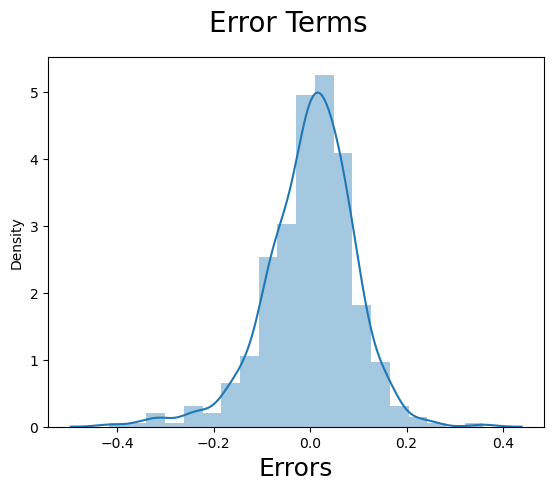

In [93]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

Error terms are following normal distribution

### Multi Colinearity

In [94]:
find_VIF(X_train_new)

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,yr,2.07
7,spring,1.99
8,summer,1.90
9,winter,1.63
6,Misty,1.55
4,sep,1.23
5,Light_snowrain,1.08
1,holiday,1.04


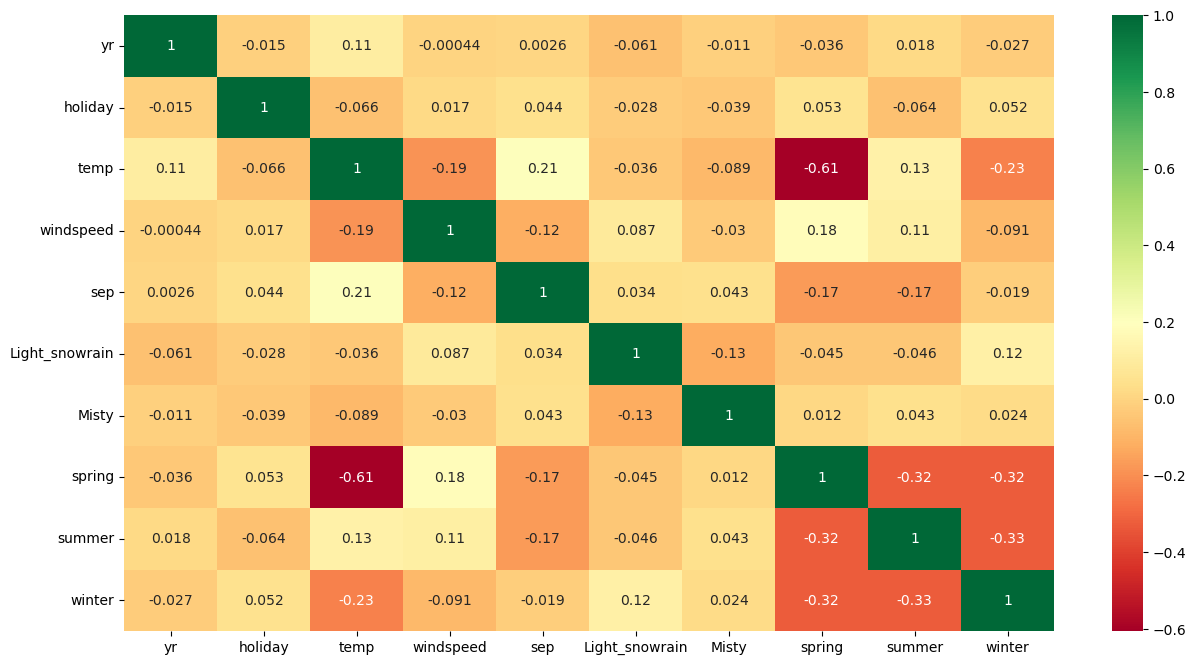

In [95]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()


VIF values are less than 5 which is good and also there is no multicolinearity as seen from the heatmap.

### Linearity

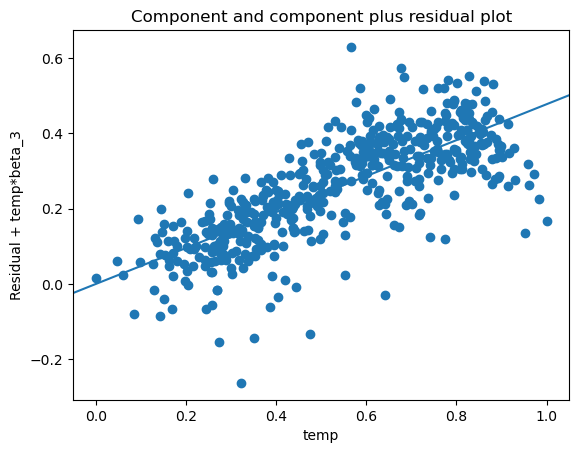

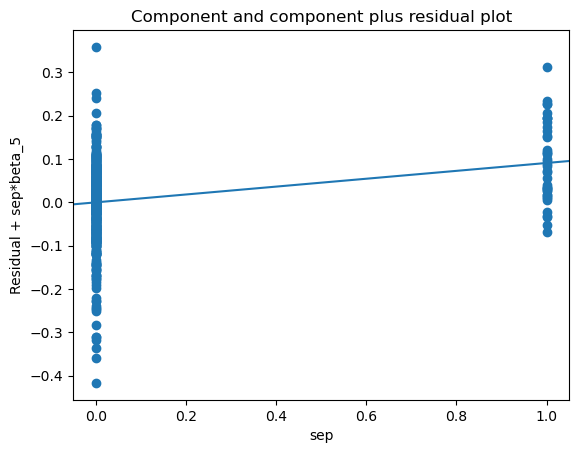

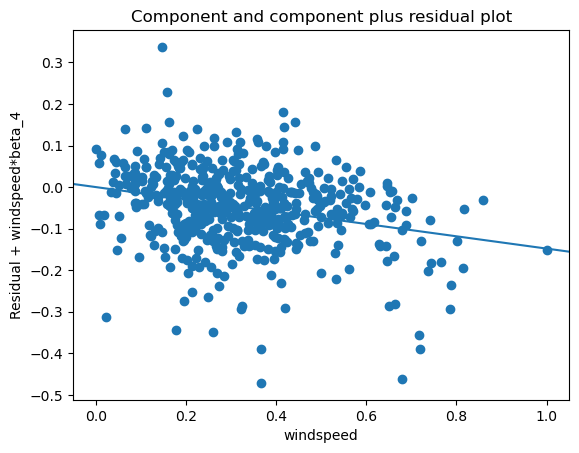

In [96]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_6, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'sep')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'windspeed')
plt.show()

Linearity can be observed from above visualizations

### Homoscedasticity

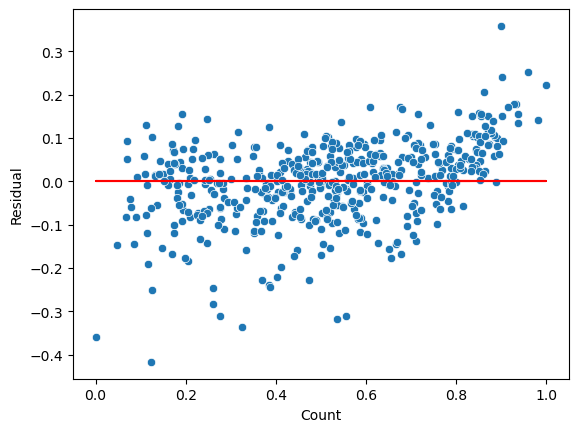

In [97]:
y_train_pred = lr_6.predict(X_train_lm_6)
residual = y_train - y_train_pred

# Separate x and y arguments for scatterplot
sns.scatterplot(x=y_train, y=residual)
plt.plot(y_train, (y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

No visible pattern observed from above plot for residuals.

### Independence of residuals

#### Durbin-Watson value of final model lr_6 is 2.085, which signifies there is no autocorrelation.

## Step 7: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. 6th model.

In [98]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
Bike_test[num_vars] = scaler.transform(Bike_test[num_vars])
Bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,aug,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,184,0,...,0,0,0,0,1,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,535,0,...,0,0,1,0,0,0,0,0,1,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,299,0,...,1,0,0,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,221,1,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,152,0,...,1,0,0,0,0,0,0,0,1,0


In [99]:
Bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,aug,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154,357.127273,0.059091,...,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163,214.116582,0.236333,...,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,170.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,349.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,538.750000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,729.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [100]:

y_test = Bike_test.pop('cnt')
X_test = Bike_test

In [101]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_6 = sm.add_constant(X_test)

In [102]:
y_pred = lr_6.predict(X_test_lm_6)

In [103]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8038

## Step 8: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

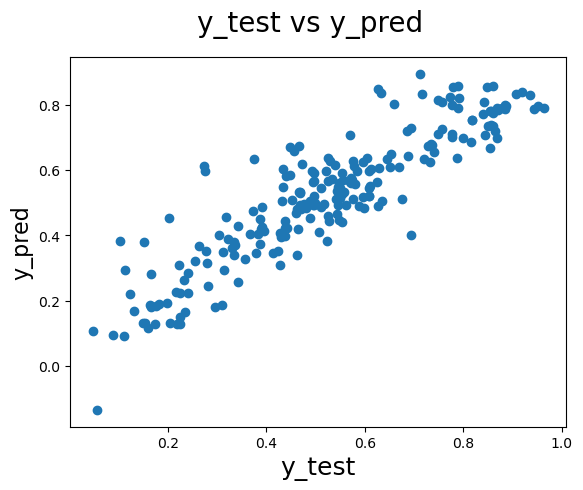

In [104]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [105]:
round(lr_6.params,4)

const             0.1909
yr                0.2341
holiday          -0.0963
temp              0.4777
windspeed        -0.1481
sep               0.0910
Light_snowrain   -0.2850
Misty            -0.0787
spring           -0.0554
summer            0.0621
winter            0.0945
dtype: float64

In [106]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7944


cnt = 0.1909 + 0.2341 * yr -0.963 * holiday + 0.4777 * temp -0.1481 * windspeed + 0.0910 * sep -0.2850 * Light_snowrain -0.0787 * Misty -0.0554 * spring + 0.0621 * summer + 0.0945 * winter

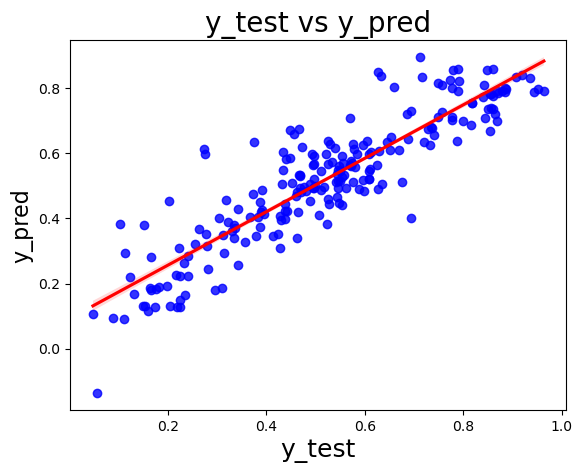

In [107]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

Comparision between Training and Testing dataset:
- Train dataset R^2          : 0.833
- Test dataset R^2           : 0.8038
- Train dataset Adjusted R^2 : 0.829    
- Test dataset Adjusted R^2  : 0.7944

All the positive coefficients like yr,temp,sep,summer,winter indicate that an increase in these values will lead to an increase in the value of cnt.

All the negative coefficients indicate that an increase in these values will lead to a decrease in the value of cnt

- Coeffiencients of the variables explains the factors effecting the bike demand



- Based on final model top three features contributing significantly towards explaining the demand are:

- Temp (0.4777)

- weathersit : Light_snowrain (-0.2850)

- year (0.2341)

Hence, it can be clearly concluded that the variables temperature , season/ weather situation and month are significant in predicting the demand for shared bikes 

## Final Recommendations for the Company:

- The months - Jan , Jul , Sep , Nov , Dec should be considered by the company as they have a higher demand as compared to other months.
- With an increase in temperature the demand also increases, hence it should keep track of the weather conditions.
- During the Winter season the demand rises, hence it should be well prepared to meet the high demand.
- Holiday time seems to be least interesting bor biking, little motavation and marketing might help here.